In [1]:
# Import modules
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing

In [2]:
# Import data
train = pd.read_csv('../data/train_clean.csv', index_col=0)
qual = pd.read_csv('../data/train_qual.csv', index_col=0)

In [3]:
price = train[['SalePrice']]
size = train[['GrLivArea']]
age = train[['YearBuilt']]
age = 2019-age

In [4]:
price= price - 37800

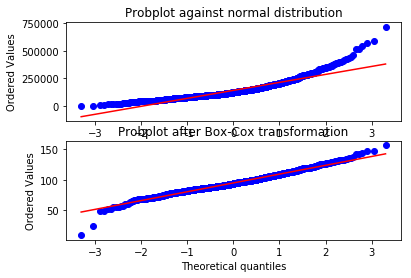

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = price['SalePrice']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)


xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()
price = xt

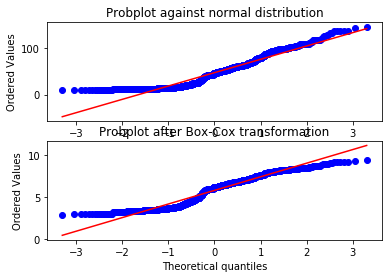

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
x = age['YearBuilt']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)


xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()
age = xt

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


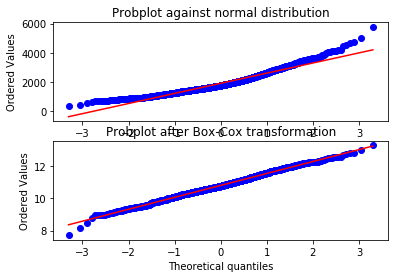

In [7]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
size['GrLivArea']=size['GrLivArea']+3
x = size['GrLivArea']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)

size = stats.boxcox(x)

xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()
size = xt

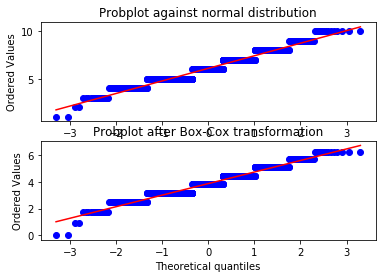

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(211)

x = qual['OverallQual']
prob = stats.probplot(x, dist=stats.norm, plot=ax1)
ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')
#We now use boxcox to transform the data so it’s closest to normal:
ax2 = fig.add_subplot(212)

xt, _ = stats.boxcox(x)
prob = stats.probplot(xt, dist=stats.norm, plot=ax2)
ax2.set_title('Probplot after Box-Cox transformation')

plt.show()
qual = xt

In [9]:

qual = qual + 1

In [10]:
# Normalize
price = (price - price.mean()) / price.std()
age = (age - age.mean()) / age.std()
size = (size - size.mean()) / size.std()
qual = (qual - qual.mean()) / qual.std()

In [11]:
price = pd.DataFrame(price.T)
age = pd.DataFrame(age.T)
size = pd.DataFrame(size.T)
qual = pd.DataFrame(qual.T)

Coefficients: 
 [[0.85701768]]
Mean squared error: 0.32
Variance score: 0.65


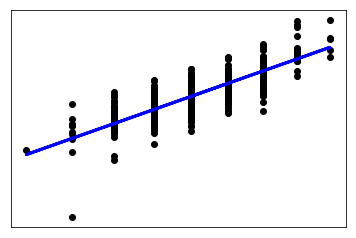

In [12]:
# Simple linear model predicting house price by overall quality

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Split the data into training/testing sets
qual_train = qual[0:700]
qual_test = qual[701:1401]

# Split the targets into training/testing sets
price_train = price[0:700]
price_test = price[701:1401]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(qual_train, price_train)

# Make predictions using the testing set
price_pred = regr.predict(qual_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(price_test, price_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(price_test, price_pred))

# Plot outputs
plt.scatter(qual_test, price_test,  color='black')
plt.plot(qual_test, price_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [[0.80348876]]
Mean squared error: 0.42
Variance score: 0.54


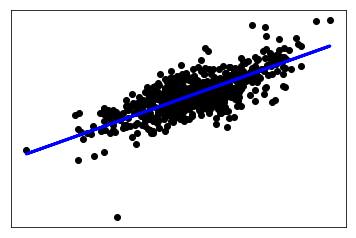

In [13]:
# Simple linear model predicting house price by square footage

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Split the data into training/testing sets
size_train = size[0:700]
size_test = size[701:1401]

# Split the targets into training/testing sets
price_train = price[0:700]
price_test = price[701:1401]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(size_train, price_train)

# Make predictions using the testing set
price_pred = regr.predict(size_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(price_test, price_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(price_test, price_pred))

# Plot outputs
plt.scatter(size_test, price_test,  color='black')
plt.plot(size_test, price_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Coefficients: 
 [[-0.66861106]]
Mean squared error: 0.57
Variance score: 0.37


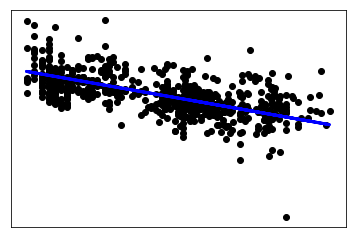

In [14]:
# Simple linear model predicting house price by age

from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Split the data into training/testing sets
age_train = age[0:700]
age_test = age[701:1401]

# Split the targets into training/testing sets
price_train = price[0:700]
price_test = price[701:1401]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(age_train, price_train)

# Make predictions using the testing set
price_pred = regr.predict(age_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(price_test, price_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(price_test, price_pred))

# Plot outputs
plt.scatter(age_test, price_test,  color='black')
plt.plot(age_test, price_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

Text(0, 0.5, '$R^2$')

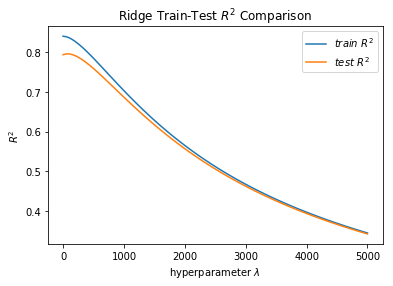

In [38]:
from sklearn.linear_model import Ridge

train_x = pd.concat([age[0:700], size[0:700], qual[0:700]], axis=1)
test_x = pd.concat([age[700:1400], size[700:1400], qual[700:1400]], axis=1)

# Split the targets into training/testing sets
train_y = price[0:700]
test_y = price[700:1400]

# create a ridge regression instance
ridge = Ridge()

ridge_scores_train = []
ridge_scores_test = []

alphas = np.linspace(0, 5000, 100)

for alpha in alphas:
    ridge.set_params(alpha=alpha,normalize=False)
    ridge.fit(train_x, train_y)
    ridge_scores_train.append(ridge.score(train_x, train_y))
    ridge_scores_test.append(ridge.score(test_x, test_y))
    
ridge_scores_train = np.array(ridge_scores_train)
ridge_scores_test = np.array(ridge_scores_test)

plt.plot(alphas, ridge_scores_train, label=r'$train\ R^2$')
plt.plot(alphas, ridge_scores_test, label=r'$test\ R^2$')
plt.legend(loc=1)
plt.title(r'Ridge Train-Test $R^2$ Comparison')

plt.xlabel(r'hyperparameter $\lambda$')
plt.ylabel(r'$R^2$')